<a href="https://colab.research.google.com/github/yucaret/brewing_challenge/blob/main/brewing_data_and_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/"My Drive"/Iniciativas/20201127_Backus_Challenge

/content/drive/My Drive/Iniciativas/20201127_Backus_Challenge


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
def reduce_memory(ds_tmp):
    int_columns = ds_tmp.select_dtypes(include=[np.int16,np.int32,np.int64]).columns.tolist()
    for col in int_columns:
        ds_tmp[col] = pd.to_numeric(arg=ds_tmp[col], downcast='integer')

    float_columns = ds_tmp.select_dtypes(include=[np.float64]).columns.tolist()
    for col in float_columns:
        ds_tmp[col] = pd.to_numeric(arg=ds_tmp[col], downcast='float')

# **Carga de Cliente**

In [ ]:
ds_cliente = pd.read_csv('./01_input/clients_attributes.csv')

In [ ]:
ds_cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15069 entries, 0 to 15068
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Cliente           15069 non-null  int64 
 1   FechaAltaCliente  15069 non-null  object
 2   Region            15069 non-null  int64 
 3   Gerencia          15069 non-null  int64 
 4   SubCanal          15069 non-null  int64 
 5   TipoPoblacion     15069 non-null  int64 
 6   Estrato           15069 non-null  int64 
 7   EF                15069 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 941.9+ KB


In [ ]:
ds_cliente.head()

,Cliente,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF
0,1,2009-03-03,4,21,12,1,1,1
1,9,2009-03-03,4,21,9,2,3,1
2,15,2009-03-03,4,21,9,2,3,0
3,37,2009-03-03,4,21,16,2,3,1
4,43,2009-03-03,4,21,9,2,3,0


In [ ]:
# Variables de Cliente
ds_cliente['AnhoAltaCliente'] = ds_cliente['FechaAltaCliente'].str[0:4]
ds_cliente['MesAltaCliente'] = ds_cliente['FechaAltaCliente'].str[5:7]
ds_cliente = pd.get_dummies(ds_cliente, columns = ['Region'])
ds_cliente = pd.get_dummies(ds_cliente, columns = ['Gerencia'])
ds_cliente = pd.get_dummies(ds_cliente, columns = ['SubCanal'])
ds_cliente = pd.get_dummies(ds_cliente, columns = ['TipoPoblacion'])
ds_cliente = pd.get_dummies(ds_cliente, columns = ['Estrato'])
ds_cliente = pd.get_dummies(ds_cliente, columns = ['EF'])

del ds_cliente['FechaAltaCliente']

ds_cliente = pd.get_dummies(ds_cliente, columns = ['AnhoAltaCliente'])
ds_cliente = pd.get_dummies(ds_cliente, columns = ['MesAltaCliente'])

reduce_memory(ds_cliente)

In [ ]:
ds_cliente.head(10)

,Cliente,Region_1,Region_2,Region_3,Region_4,Region_5,Gerencia_1,Gerencia_2,Gerencia_3,Gerencia_4,Gerencia_5,Gerencia_6,Gerencia_7,Gerencia_8,Gerencia_9,Gerencia_10,Gerencia_11,Gerencia_12,Gerencia_13,Gerencia_14,Gerencia_15,Gerencia_16,Gerencia_17,Gerencia_18,Gerencia_19,Gerencia_20,Gerencia_21,Gerencia_22,Gerencia_23,Gerencia_24,Gerencia_25,Gerencia_26,Gerencia_27,Gerencia_28,Gerencia_29,Gerencia_30,Gerencia_31,Gerencia_32,Gerencia_33,Gerencia_34,...,SubCanal_21,SubCanal_22,SubCanal_23,SubCanal_24,SubCanal_25,SubCanal_26,SubCanal_27,TipoPoblacion_1,TipoPoblacion_2,Estrato_1,Estrato_2,Estrato_3,Estrato_4,Estrato_5,Estrato_6,EF_0,EF_1,AnhoAltaCliente_2009,AnhoAltaCliente_2010,AnhoAltaCliente_2011,AnhoAltaCliente_2012,AnhoAltaCliente_2013,AnhoAltaCliente_2014,AnhoAltaCliente_2015,AnhoAltaCliente_2016,AnhoAltaCliente_2017,AnhoAltaCliente_2018,AnhoAltaCliente_2019,MesAltaCliente_01,MesAltaCliente_02,MesAltaCliente_03,MesAltaCliente_04,MesAltaCliente_05,MesAltaCliente_06,MesAltaCliente_07,MesAltaCliente_08,MesAltaCliente_09,MesAltaCliente_10,MesAltaCliente_11,MesAltaCliente_12
0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,15,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,37,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,43,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,70,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,71,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,75,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,88,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,90,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# **Carga de Promos Activas y Ejecutadas**

In [ ]:
ds_activa = pd.read_csv('./01_input/active_promos.csv')
ds_ejecutada = pd.read_csv('./01_input/executed_promos.csv')

In [ ]:
ds_activa.count()

CodigoDC       422437
Marca          422437
Cupo           422437
Fecha_Desde    422437
Fecha_Hasta    422437
Cliente        422437
dtype: int64

In [ ]:
ds_ejecutada.count()

CodigoDC    27794
Cliente     27794
Marca       27794
Cupo        27794
dtype: int64

In [ ]:
#Variables de Promocion
ds_ejecutada['Target'] = 1

ds_promos = pd.merge(ds_activa, ds_ejecutada, how='left', on=['CodigoDC','Cliente','Marca','Cupo'])

ds_promos['CantidadPromosActivas'] = 1

ds_promos = ds_promos[['CodigoDC', 'Cliente', 'Marca', 'Cupo', 'Fecha_Desde' ,'Fecha_Hasta', 'CantidadPromosActivas', 'Target']]

ds_promos['Target'] = np.where(pd.isna(ds_promos['Target']),0, ds_promos['Target'])
ds_promos['Target'] = (ds_promos['Target']).astype(int)
ds_promos['MarcaPromo'] = ds_promos['Marca']
ds_promos['CupoPromo'] = ds_promos['Cupo']

ds_promos = pd.get_dummies(ds_promos, columns = ['MarcaPromo'])
ds_promos = pd.get_dummies(ds_promos, columns = ['CupoPromo'])

ds_promos = ds_promos[['CodigoDC', 'Cliente', 'Marca', 'Cupo', 'Target','Fecha_Desde', 'Fecha_Hasta', 'CantidadPromosActivas', 'MarcaPromo_29', 'MarcaPromo_39', 'MarcaPromo_40', 'CupoPromo_9', 'CupoPromo_16', 'CupoPromo_20']]

#Duracion de Promocion
ds_promos['FechaDesde_DT'] = pd.to_datetime(ds_promos['Fecha_Desde'])
ds_promos['FechaHasta_DT'] = pd.to_datetime(ds_promos['Fecha_Hasta'])

ds_promos['Duracion'] = (((ds_promos['FechaHasta_DT'] - ds_promos['FechaDesde_DT'])/ np.timedelta64(1, 'D')).astype(int) + 1)

del ds_promos['FechaDesde_DT'], ds_promos['FechaHasta_DT']

In [ ]:
# Variables de Fecha
ds_promos['AnhoDesda'] = ds_promos['Fecha_Desde'].str[0:4]
ds_promos['AnhoMesDesde'] = ds_promos['Fecha_Desde'].str[0:7]
ds_promos['AnhoHasta'] = ds_promos['Fecha_Hasta'].str[0:4]
ds_promos['AnhoMesHasta'] = ds_promos['Fecha_Hasta'].str[0:7]

del ds_promos['Fecha_Desde'], ds_promos['Fecha_Hasta']

ds_promos = pd.get_dummies(ds_promos, columns = ['AnhoDesda'])
ds_promos = pd.get_dummies(ds_promos, columns = ['AnhoMesDesde'])
ds_promos = pd.get_dummies(ds_promos, columns = ['AnhoHasta'])
ds_promos = pd.get_dummies(ds_promos, columns = ['AnhoMesHasta'])

reduce_memory(ds_promos)

In [ ]:
# Data de promo sumarizada a Nivel de Cliente Marca Cupo sobre Cantidades
ds_promosCantidad = ds_promos.copy()
del ds_promosCantidad['Duracion']

columnasPromo = {}

for i in ds_promosCantidad.columns[4:]:
  columnasPromo[i] = 'sum'

ds_promosCantidad = ds_promosCantidad.groupby(['Cliente','Marca','Cupo'], as_index=True ).agg(columnasPromo)
ds_promosCantidad.reset_index(inplace=True)

reduce_memory(ds_promosCantidad)

for i in ds_promosCantidad.columns[5:]:
  ds_promosCantidad = ds_promosCantidad.rename(columns={i: 'CantidadPromosActivas_' + i})

In [ ]:
# Data de promo sumarizada a Nivel de Cliente Marca Cupo sobre Duracion
ds_promosDuracion = ds_promos.copy()
del ds_promosDuracion['CantidadPromosActivas']

for i in ds_promosDuracion.columns[5:]:
  if (i!="Duracion"):
    ds_promosDuracion[i] = ds_promosDuracion[i]*ds_promosDuracion['Duracion']

columnasPromo = {}

for i in ds_promosDuracion.columns[5:]:
  columnasPromo[i] = 'sum'
  
ds_promosDuracion = ds_promosDuracion.groupby(['Cliente','Marca','Cupo'], as_index=True ).agg(columnasPromo)
ds_promosDuracion.reset_index(inplace=True)

reduce_memory(ds_promosDuracion)

for i in ds_promosDuracion.columns[3:]:
  if (i!="Duracion"):
    ds_promosDuracion = ds_promosDuracion.rename(columns={i: 'Duracion_' + i})

In [ ]:
# Data de promo sumarizada a Nivel de Cliente sobre Cantidades
columnasPromo = {}

for i in ds_promosCantidad.columns[4:]:
  columnasPromo[i] = 'sum'

ds_promosCantidadCliente = ds_promosCantidad.groupby(['Cliente'], as_index=True ).agg(columnasPromo)
ds_promosCantidadCliente.reset_index(inplace=True)

for i in ds_promosCantidadCliente.columns[1:]:
  ds_promosCantidadCliente = ds_promosCantidadCliente.rename(columns={i: 'Cliente_' + i})

In [ ]:
# Data de promo sumarizada a Nivel de Cliente sobre Duracion
columnasPromo = {}

for i in ds_promosDuracion.columns[3:]:
  columnasPromo[i] = 'sum'

ds_promosDuracionCliente = ds_promosDuracion.groupby(['Cliente'], as_index=True ).agg(columnasPromo)
ds_promosDuracionCliente.reset_index(inplace=True)

for i in ds_promosDuracionCliente.columns[1:]:
  ds_promosDuracionCliente = ds_promosDuracionCliente.rename(columns={i: 'Cliente_' + i})

In [ ]:
ds_promos = pd.merge(ds_promosCantidad, ds_promosDuracion, how='left', on=['Cliente','Marca', 'Cupo'])
ds_promos = pd.merge(ds_promos, ds_promosCantidadCliente, how='left', on=['Cliente'])
ds_promos = pd.merge(ds_promos, ds_promosDuracionCliente, how='left', on=['Cliente'])
reduce_memory(ds_promos)

In [ ]:
ds_promos['Target'] = np.where(ds_promos['Target']>=1,1,0)

del ds_promosCantidad, ds_promosDuracion, ds_promosCantidadCliente, ds_promosDuracionCliente

# **Carga de Ventas**

In [ ]:
ds_ventas = pd.read_csv('./01_input/sales.csv', engine='python')
ds_ventas = ds_ventas.rename(columns={ ds_ventas.columns[1]: "AnhoVenta", "Mes": "MesVenta" })
reduce_memory(ds_ventas)

In [ ]:
ds_ventas.count()

Cliente           1894252
AnhoVenta         1894252
MesVenta          1894252
ClaseEnvase       1894252
SegmentoPrecio    1894247
Marca             1894252
Cupo              1894247
Nr                1894252
Hl                1894252
Dcto              1894252
dtype: int64

In [ ]:
# Variables de Ventas
ds_ventas['SegmentoPrecio'] = np.where(pd.isna(ds_ventas['SegmentoPrecio']), 0, ds_ventas['SegmentoPrecio'])
ds_ventas['SegmentoPrecio'] = (ds_ventas['SegmentoPrecio']).astype(int)

ds_ventas['Cupo'] = np.where(pd.isna(ds_ventas['Cupo']), 0, ds_ventas['Cupo'])
ds_ventas['Cupo'] = (ds_ventas['Cupo']).astype(int)

ds_ventas['CantidadVentas'] = 1
ds_ventas['CantidadVentas'] = (ds_ventas['CantidadVentas']).astype(int)

ds_ventas = ds_ventas[['Cliente', 'Marca', 'Cupo', 'AnhoVenta', 'MesVenta', 'ClaseEnvase', 'SegmentoPrecio', 'Nr', 'Hl', 'Dcto', 'CantidadVentas']]

ds_ventas['MarcaVenta'] = ds_ventas['Marca']
ds_ventas['CupoVenta'] = ds_ventas['Cupo']

ds_ventas = pd.get_dummies(ds_ventas, columns = ['MarcaVenta'])
ds_ventas = pd.get_dummies(ds_ventas, columns = ['CupoVenta'])
ds_ventas = pd.get_dummies(ds_ventas, columns = ['ClaseEnvase'])
ds_ventas = pd.get_dummies(ds_ventas, columns = ['SegmentoPrecio'])

ds_ventas['AnhoMesVenta'] = ds_ventas['AnhoVenta'].astype(str) + '_' + ds_ventas['MesVenta'].astype(str)

ds_ventas = pd.get_dummies(ds_ventas, columns = ['AnhoVenta'])
ds_ventas = pd.get_dummies(ds_ventas, columns = ['AnhoMesVenta'])

del ds_ventas['MesVenta']

reduce_memory(ds_ventas)

In [ ]:
# Data de Ventas sumarizada a Nivel de Cliente Marca Cupo sobre Cantidades
ds_ventasCantidad = ds_ventas.copy()
del ds_ventasCantidad['Nr'], ds_ventasCantidad['Hl'], ds_ventasCantidad['Dcto']

columnasVentas = {}

for i in ds_ventasCantidad.columns[3:]:
  columnasVentas[i] = 'sum'

ds_ventasCantidad = ds_ventasCantidad.groupby(['Cliente','Marca','Cupo'], as_index=True ).agg(columnasVentas)
ds_ventasCantidad.reset_index(inplace=True)

In [ ]:
# Data de Ventas sumarizada a Nivel de Cliente Marca Cupo sobre NR
ds_ventasNr = ds_ventas.copy()
del ds_ventasNr['CantidadVentas'], ds_ventasNr['Hl'], ds_ventasNr['Dcto']

for i in ds_ventasNr.columns[4:]:
  ds_ventasNr[i] = ds_ventasNr[i]*ds_ventasNr['Nr']

columnasVentas = {}

for i in ds_ventasNr.columns[3:]:
  columnasVentas[i] = 'sum'

ds_ventasNr = ds_ventasNr.groupby(['Cliente','Marca','Cupo'], as_index=True ).agg(columnasVentas)
ds_ventasNr.reset_index(inplace=True)

reduce_memory(ds_ventasNr)

for i in ds_ventasNr.columns[4:]:
  ds_ventasNr = ds_ventasNr.rename(columns={i: 'Nr_' + i})

In [ ]:
# Data de Ventas sumarizada a Nivel de Cliente Marca Cupo sobre HL
ds_ventasHl = ds_ventas.copy()
del ds_ventasHl['CantidadVentas'], ds_ventasHl['Nr'], ds_ventasHl['Dcto']

for i in ds_ventasHl.columns[4:]:
  ds_ventasHl[i] = ds_ventasHl[i]*ds_ventasHl['Hl']

columnasVentas = {}

for i in ds_ventasHl.columns[3:]:
  columnasVentas[i] = 'sum'

ds_ventasHl = ds_ventasHl.groupby(['Cliente','Marca','Cupo'], as_index=True ).agg(columnasVentas)
ds_ventasHl.reset_index(inplace=True)

reduce_memory(ds_ventasHl)

for i in ds_ventasHl.columns[4:]:
  ds_ventasHl = ds_ventasHl.rename(columns={i: 'Hl_' + i})

In [ ]:
# Data de Ventas sumarizada a Nivel de Cliente Marca Cupo sobre Descuento
ds_ventasDcto = ds_ventas.copy()
del ds_ventasDcto['CantidadVentas'], ds_ventasDcto['Nr'], ds_ventasDcto['Hl']

for i in ds_ventasDcto.columns[4:]:
  ds_ventasDcto[i] = ds_ventasDcto[i]*ds_ventasDcto['Dcto']

columnasVentas = {}

for i in ds_ventasDcto.columns[3:]:
  columnasVentas[i] = 'sum'

ds_ventasDcto = ds_ventasDcto.groupby(['Cliente','Marca','Cupo'], as_index=True ).agg(columnasVentas)
ds_ventasDcto.reset_index(inplace=True)

reduce_memory(ds_ventasDcto)

for i in ds_ventasDcto.columns[4:]:
  ds_ventasDcto = ds_ventasDcto.rename(columns={i: 'Dcto_' + i})

In [ ]:
# Data de Ventas sumarizada a Nivel de Cliente sobre Cantidades
columnasVentas = {}

for i in ds_ventasCantidad.columns[3:]:
  columnasVentas[i] = 'sum'

ds_ventasCantidadCliente = ds_ventasCantidad.groupby(['Cliente'], as_index=True ).agg(columnasVentas)
ds_ventasCantidadCliente.reset_index(inplace=True)

for i in ds_ventasCantidadCliente.columns[1:]:
  ds_ventasCantidadCliente = ds_ventasCantidadCliente.rename(columns={i: 'Cliente_' + i})

In [ ]:
# Data de Ventas sumarizada a Nivel de Cliente sobre NR
columnasVentas = {}

for i in ds_ventasNr.columns[3:]:
  columnasVentas[i] = 'sum'

ds_ventasNrCliente = ds_ventasNr.groupby(['Cliente'], as_index=True ).agg(columnasVentas)
ds_ventasNrCliente.reset_index(inplace=True)

for i in ds_ventasNrCliente.columns[1:]:
  ds_ventasNrCliente = ds_ventasNrCliente.rename(columns={i: 'Cliente_' + i})

In [ ]:
# Data de Ventas sumarizada a Nivel de Cliente sobre HL
columnasVentas = {}

for i in ds_ventasHl.columns[3:]:
  columnasVentas[i] = 'sum'

ds_ventasHlCliente = ds_ventasHl.groupby(['Cliente'], as_index=True ).agg(columnasVentas)
ds_ventasHlCliente.reset_index(inplace=True)

for i in ds_ventasHlCliente.columns[1:]:
  ds_ventasHlCliente = ds_ventasHlCliente.rename(columns={i: 'Cliente_' + i})

In [ ]:
# Data de Ventas sumarizada a Nivel de Cliente sobre Descuento
columnasVentas = {}

for i in ds_ventasDcto.columns[3:]:
  columnasVentas[i] = 'sum'

ds_ventasDctoCliente = ds_ventasDcto.groupby(['Cliente'], as_index=True ).agg(columnasVentas)
ds_ventasDctoCliente.reset_index(inplace=True)

for i in ds_ventasDctoCliente.columns[1:]:
  ds_ventasDctoCliente = ds_ventasDctoCliente.rename(columns={i: 'Cliente_' + i})

# **Genera Base**

In [ ]:
ds_data = pd.merge(ds_promos, ds_cliente, how='left', on=['Cliente'])

ds_data = pd.merge(ds_data, ds_ventasCantidad, how='left', on=['Cliente', 'Marca', 'Cupo'])
ds_data = pd.merge(ds_data, ds_ventasNr, how='left', on=['Cliente', 'Marca', 'Cupo'])
ds_data = pd.merge(ds_data, ds_ventasHl, how='left', on=['Cliente', 'Marca', 'Cupo'])
ds_data = pd.merge(ds_data, ds_ventasDcto, how='left', on=['Cliente', 'Marca', 'Cupo'])
ds_data = pd.merge(ds_data, ds_ventasCantidadCliente, how='left', on=['Cliente'])
ds_data = pd.merge(ds_data, ds_ventasNrCliente, how='left', on=['Cliente'])
ds_data = pd.merge(ds_data, ds_ventasHlCliente, how='left', on=['Cliente'])
ds_data = pd.merge(ds_data, ds_ventasDctoCliente, how='left', on=['Cliente'])

reduce_memory(ds_data)

In [ ]:
ds_data.shape

(34551, 1202)

In [ ]:
ds_data.to_csv('./02_output/ds_data.csv',index=False)

In [ ]:
ds_data = pd.read_csv('./02_input/ds_data.csv')
reduce_memory(ds_data)

# **Modelo**

In [ ]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

# Librerias del modelo
from keras.models import Sequential
from keras.layers import BatchNormalization, Input, Dropout, Dense,Activation
from keras.regularizers import l1, l2
from keras.models import Model, load_model
from keras.callbacks import EarlyStopping

Estandarizando Datos Para Modelo

In [ ]:
ds_target = ds_data['Target']
ds_key = ds_data.iloc[:,:3]
ds_features = ds_data.iloc[:,4:]

In [ ]:
array_x = np.asarray(ds_features)
array_y = np.asarray(ds_target)

# Version 1
#array_train_x, array_valid_x, array_train_y, array_valid_y = train_test_split(array_x,
#                                                                              array_y,
#                                                                              test_size=0.02,
#                                                                              random_state=42)
#

# Version 2
array_train_x, array_valid_x, array_train_y, array_valid_y = train_test_split(array_x,
                                                                              array_y,
                                                                              test_size=0.006,
                                                                              random_state=42)


array_valid_x, array_test_x, array_valid_y, array_test_y = train_test_split(array_valid_x,
                                                                            array_valid_y,
                                                                            test_size=0.5,
                                                                            random_state=42)



del array_x, array_y

In [ ]:
array_train_x_mean = array_train_x.mean(axis=0)
print("mean for x train: ok")
array_train_x_std = array_train_x.std(axis=0)
print("std for x train: ok")

array_valid_x_mean = array_valid_x.mean(axis=0)
print("mean for x valid: ok")
array_valid_x_std = array_valid_x.std(axis=0)
print("std for x valid: ok")

array_test_x_mean = array_test_x.mean(axis=0)
print("mean for x test: ok")
array_test_x_std = array_test_x.std(axis=0)
print("std for x test: ok")


array_train_x = (array_train_x - array_train_x_mean) / array_train_x_std
array_train_x = np.where(np.isnan(array_train_x), 0, array_train_x)

array_valid_x = (array_valid_x - array_valid_x_mean) / array_valid_x_std
array_valid_x = np.where(np.isnan(array_valid_x), 0, array_valid_x)

array_test_x = (array_test_x - array_test_x_mean) / array_test_x_std
array_test_x = np.where(np.isnan(array_test_x), 0, array_test_x)

mean for x train: ok
std for x train: ok
mean for x valid: ok
std for x valid: ok
mean for x test: ok
std for x test: ok


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


Definiendo Red

In [ ]:
def executepromo_model(input_shape):
	
    X_input = Input(input_shape)
    
    print('1: Shape Capa de ingreso: ' + str(X_input))

    #Version 3
    #X = Dense(550, input_dim=input_shape, kernel_regularizer=l2(0.001))(X_input)
    #Version 4
    X = Dense(800, input_dim=input_shape, kernel_regularizer=l2(0.001))(X_input)
    X = Activation('relu')(X)
    X = BatchNormalization(name = 'bn1')(X)
    X = Dropout(0.2)(X)
        
    print('2: Shape Capa 1: ' + str(X.shape))
    
    X = Dense(3000, kernel_regularizer=l2(0.001))(X)
    X = Activation('relu')(X)
    X = BatchNormalization(name = 'bn2')(X)
    X = Dropout(0.2)(X)
    
    print('3: Shape Capa 2: ' + str(X.shape))
    
    X = Dense(1000, kernel_regularizer=l2(0.001))(X)
    X = Activation('relu')(X)
    X = BatchNormalization(name = 'bn3')(X)
    X = Dropout(0.2)(X)
    
    print('4: Shape Capa 3: ' + str(X.shape))
    
    X = Dense(500, kernel_regularizer=l2(0.001))(X)
    X = Activation('relu')(X)
    X = BatchNormalization(name = 'bn4')(X)
    X = Dropout(0.2)(X)
    
    print('5: Shape Capa 4: ' + str(X.shape))
    
    X = Dense(100, kernel_regularizer=l2(0.001))(X)
    X = Activation('relu')(X)
    X = BatchNormalization(name = 'bn5')(X) #loss: 238.68781401787277
    X = Dropout(0.2)(X)
    
    print('5: Shape Capa 5: ' + str(X.shape))
    
    X = Dense(1, activation="sigmoid")(X)
    
    print('6: Shape Capa de Salida: ' + str(X.shape))
    
    model = Model(inputs = X_input, outputs = X, name='executepromo_model')
    
    return model

Creando Red

In [ ]:
executePromo = executepromo_model(array_train_x.shape[1:])

executePromo.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

#Version 1
#1: Shape Capa de ingreso: Tensor("input_5:0", shape=(None, 796), dtype=float32)
#2: Shape Capa 1: (None, 500)
#3: Shape Capa 2: (None, 1000)
#4: Shape Capa 3: (None, 1000)
#5: Shape Capa 4: (None, 500)
#5: Shape Capa 5: (None, 50)
#6: Shape Capa de Salida: (None, 1)

#Version 2 y 3
#1: Shape Capa de ingreso: Tensor("input_8:0", shape=(None, 796), dtype=float32)
#2: Shape Capa 1: (None, 550)
#3: Shape Capa 2: (None, 3000)
#4: Shape Capa 3: (None, 1000)
#5: Shape Capa 4: (None, 500)
#5: Shape Capa 5: (None, 100)
#6: Shape Capa de Salida: (None, 1)

#Version 4
#1: Shape Capa de ingreso: Tensor("input_3:0", shape=(None, 1198), dtype=float32)
#2: Shape Capa 1: (None, 800)
#3: Shape Capa 2: (None, 3000)
#4: Shape Capa 3: (None, 1000)
#5: Shape Capa 4: (None, 500)
#5: Shape Capa 5: (None, 100)
#6: Shape Capa de Salida: (None, 1)

1: Shape Capa de ingreso: Tensor("input_3:0", shape=(None, 1198), dtype=float32)
2: Shape Capa 1: (None, 800)
3: Shape Capa 2: (None, 3000)
4: Shape Capa 3: (None, 1000)
5: Shape Capa 4: (None, 500)
5: Shape Capa 5: (None, 100)
6: Shape Capa de Salida: (None, 1)


Ejecutando

In [ ]:
#Version 1
#result = executePromo.fit(x=array_train_x, y=array_train_y,
#                           batch_size=32,
#                           epochs=100,
#                           validation_data=(array_valid_x, array_valid_y)
#                           #, callbacks=[es]
#                           )

#Version 2 y 3
##es = EarlyStopping(monitor='val_loss', mode='min', baseline=0.4)
#result = executePromo.fit(x=array_train_x, y=array_train_y,
#                           batch_size=64,
#                           epochs= 100,
#                           validation_data=(array_valid_x, array_valid_y)
#                           #, callbacks=[es]
#                           )
#Version 4
#es = EarlyStopping(monitor='val_loss', mode='min', baseline=0.4)
result = executePromo.fit(x=array_train_x, y=array_train_y,
                           batch_size=128,
                           epochs= 100,
                           validation_data=(array_valid_x, array_valid_y)
                           #, callbacks=[es]
                           )

Epoch 1/100
269/269 [==============================] - 46s 170ms/step - loss: 3.0452 - accuracy: 0.8848 - val_loss: 1.5406 - val_accuracy: 0.8654
Epoch 2/100
269/269 [==============================] - 46s 169ms/step - loss: 0.9069 - accuracy: 0.9043 - val_loss: 0.6065 - val_accuracy: 0.8462
Epoch 3/100
269/269 [==============================] - 46s 171ms/step - loss: 0.4433 - accuracy: 0.9051 - val_loss: 0.4212 - val_accuracy: 0.8654
Epoch 4/100
269/269 [==============================] - 46s 171ms/step - loss: 0.3569 - accuracy: 0.9073 - val_loss: 0.3833 - val_accuracy: 0.8750
Epoch 5/100
269/269 [==============================] - 46s 172ms/step - loss: 0.3354 - accuracy: 0.9059 - val_loss: 0.4150 - val_accuracy: 0.8846
Epoch 6/100
269/269 [==============================] - 46s 172ms/step - loss: 0.3390 - accuracy: 0.9057 - val_loss: 0.3880 - val_accuracy: 0.8654
Epoch 7/100
269/269 [==============================] - 46s 172ms/step - loss: 0.3310 - accuracy: 0.9076 - val_loss: 0.3729 -

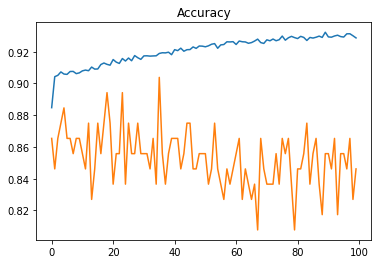

In [ ]:
pyplot.title('Accuracy')
pyplot.plot(result.history['accuracy'])
pyplot.plot(result.history['val_accuracy'])

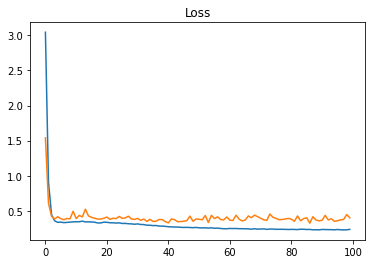

In [ ]:
# Verificacion de Score
pyplot.title('Loss')
pyplot.plot(result.history['loss'])
pyplot.plot(result.history['val_loss'])

In [ ]:
# Guardando Modelo
str_version = '4'
path_str = './'

modelpath_str = path_str + '03_model/'
executePromo.save(modelpath_str  + 'modeloexecutepromo_' + str_version + '.h5')
print("Saved model to disk")

Saved model to disk


In [ ]:
#Cargando Modelo
path_str = 'C:/yucaret/proyectos/Inclusion_Financiera/'
modelpath_str = path_str + '04_Model/'
smartbillingModel = load_model(modelpath_str + 'modeloinclusion_' + str_version + '.h5')
print("Model loaded from disk")

In [ ]:
scores = executePromo.evaluate(array_test_x, array_test_y)

print(str(executePromo.metrics_names[0]) + ': ' + str(scores[0]*100))
#v1 ....... loss: 28.660443425178528
#v2 ....... loss: 31.449386477470398
#v3 ....... loss: 51.688551902770996
#v4 ....... loss: 40.01902937889099 

4/4 [==============================] - 0s 20ms/step - loss: 0.4002 - accuracy: 0.8365
loss: 40.01902937889099


Test

In [ ]:
ds_test = pd.read_csv('./01_input/test.csv')

In [ ]:
ds_test = pd.merge(ds_test, ds_promos, how='left', on=['Cliente','Marca','Cupo'])
del ds_test['Ejecuto_Promo'], ds_test['Target']
ds_test = pd.merge(ds_test, ds_cliente, how='left', on=['Cliente'])

ds_test = pd.merge(ds_test, ds_ventasCantidad, how='left', on=['Cliente', 'Marca', 'Cupo'])
ds_test = pd.merge(ds_test, ds_ventasNr, how='left', on=['Cliente', 'Marca', 'Cupo'])
ds_test = pd.merge(ds_test, ds_ventasHl, how='left', on=['Cliente', 'Marca', 'Cupo'])
ds_test = pd.merge(ds_test, ds_ventasDcto, how='left', on=['Cliente', 'Marca', 'Cupo'])
ds_test = pd.merge(ds_test, ds_ventasCantidadCliente, how='left', on=['Cliente'])
ds_test = pd.merge(ds_test, ds_ventasNrCliente, how='left', on=['Cliente'])
ds_test = pd.merge(ds_test, ds_ventasHlCliente, how='left', on=['Cliente'])
ds_test = pd.merge(ds_test, ds_ventasDctoCliente, how='left', on=['Cliente'])

reduce_memory(ds_test)

In [ ]:
ds_test.head(5)

,Cliente,Marca,Cupo,CantidadPromosActivas,CantidadPromosActivas_MarcaPromo_29,CantidadPromosActivas_MarcaPromo_39,CantidadPromosActivas_MarcaPromo_40,CantidadPromosActivas_CupoPromo_9,CantidadPromosActivas_CupoPromo_16,CantidadPromosActivas_CupoPromo_20,CantidadPromosActivas_AnhoDesda_2018,CantidadPromosActivas_AnhoDesda_2019,CantidadPromosActivas_AnhoMesDesde_2018-08,CantidadPromosActivas_AnhoMesDesde_2018-09,CantidadPromosActivas_AnhoMesDesde_2018-10,CantidadPromosActivas_AnhoMesDesde_2018-11,CantidadPromosActivas_AnhoMesDesde_2018-12,CantidadPromosActivas_AnhoMesDesde_2019-01,CantidadPromosActivas_AnhoMesDesde_2019-02,CantidadPromosActivas_AnhoMesDesde_2019-03,CantidadPromosActivas_AnhoMesDesde_2019-04,CantidadPromosActivas_AnhoMesDesde_2019-05,CantidadPromosActivas_AnhoMesDesde_2019-06,CantidadPromosActivas_AnhoMesDesde_2019-07,CantidadPromosActivas_AnhoMesDesde_2019-08,CantidadPromosActivas_AnhoMesDesde_2019-09,CantidadPromosActivas_AnhoHasta_2018,CantidadPromosActivas_AnhoHasta_2019,CantidadPromosActivas_AnhoMesHasta_2018-08,CantidadPromosActivas_AnhoMesHasta_2018-09,CantidadPromosActivas_AnhoMesHasta_2018-10,CantidadPromosActivas_AnhoMesHasta_2018-11,CantidadPromosActivas_AnhoMesHasta_2018-12,CantidadPromosActivas_AnhoMesHasta_2019-01,CantidadPromosActivas_AnhoMesHasta_2019-02,CantidadPromosActivas_AnhoMesHasta_2019-03,CantidadPromosActivas_AnhoMesHasta_2019-04,CantidadPromosActivas_AnhoMesHasta_2019-05,CantidadPromosActivas_AnhoMesHasta_2019-06,CantidadPromosActivas_AnhoMesHasta_2019-07,...,Cliente_Dcto_CupoVenta_26,Cliente_Dcto_CupoVenta_27,Cliente_Dcto_CupoVenta_28,Cliente_Dcto_CupoVenta_29,Cliente_Dcto_CupoVenta_30,Cliente_Dcto_CupoVenta_31,Cliente_Dcto_CupoVenta_32,Cliente_Dcto_CupoVenta_33,Cliente_Dcto_CupoVenta_34,Cliente_Dcto_CupoVenta_35,Cliente_Dcto_ClaseEnvase_1,Cliente_Dcto_ClaseEnvase_2,Cliente_Dcto_ClaseEnvase_3,Cliente_Dcto_SegmentoPrecio_0,Cliente_Dcto_SegmentoPrecio_1,Cliente_Dcto_SegmentoPrecio_2,Cliente_Dcto_SegmentoPrecio_3,Cliente_Dcto_SegmentoPrecio_4,Cliente_Dcto_AnhoVenta_2018,Cliente_Dcto_AnhoVenta_2019,Cliente_Dcto_AnhoMesVenta_2018_1,Cliente_Dcto_AnhoMesVenta_2018_10,Cliente_Dcto_AnhoMesVenta_2018_11,Cliente_Dcto_AnhoMesVenta_2018_12,Cliente_Dcto_AnhoMesVenta_2018_2,Cliente_Dcto_AnhoMesVenta_2018_3,Cliente_Dcto_AnhoMesVenta_2018_4,Cliente_Dcto_AnhoMesVenta_2018_5,Cliente_Dcto_AnhoMesVenta_2018_6,Cliente_Dcto_AnhoMesVenta_2018_7,Cliente_Dcto_AnhoMesVenta_2018_8,Cliente_Dcto_AnhoMesVenta_2018_9,Cliente_Dcto_AnhoMesVenta_2019_1,Cliente_Dcto_AnhoMesVenta_2019_2,Cliente_Dcto_AnhoMesVenta_2019_3,Cliente_Dcto_AnhoMesVenta_2019_4,Cliente_Dcto_AnhoMesVenta_2019_5,Cliente_Dcto_AnhoMesVenta_2019_6,Cliente_Dcto_AnhoMesVenta_2019_7,Cliente_Dcto_AnhoMesVenta_2019_8
0,10,40,16,21,0,0,21,0,21,0,11,10,0,4,3,4,0,1,0,2,1,1,0,1,2,2,11,10,0,4,3,4,0,1,0,2,1,0,0,1,...,0.000000,0.0,0.0,-7169.910156,-717.989990,-205.710007,-5555.750000,0.000000,-7384.030273,-5400.0,-116905.835938,-1.817231e+06,0.0,0.0,-1.507927e+06,-33943.371094,-328624.531250,-63642.132812,-1.494109e+06,-440027.718750,-63029.320312,-163943.812500,-289801.062500,-157526.937500,-44528.589844,-114701.171875,-139771.812500,-75364.375000,-93530.171875,-123260.281250,-160558.312500,-68093.179688,-68379.406250,-108857.460938,-63302.671875,-37508.679688,-28139.050781,-71065.195312,-19416.800781,-43358.460938
1,17,29,9,4,4,0,0,4,0,0,0,4,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,4,0,0,0,0,0,0,0,0,1,1,0,0,...,-158701.031250,0.0,0.0,-29635.330078,-27074.550781,-822.859985,-21134.621094,-13627.060547,-31403.378906,-4320.0,-567738.312500,-2.499202e+06,0.0,0.0,-2.117430e+06,-351101.281250,-336727.375000,-261682.109375,-2.269518e+06,-797421.625000,-296342.687500,-197973.921875,-285545.937500,-145571.625000,-141727.812500,-162150.578125,-54423.398438,-79868.312500,-235854.437500,-246409.015625,-223142.781250,-200508.078125,-131625.781250,-175513.109375,-116557.007812,-28600.468750,-57887.812500,-41383.640625,-121067.742188,-124786.062500
2,37,29,9,3,3,0,0,3,0,0,0,3,0,0,0,0,0,0,0

In [ ]:
ds_features.columns

Index(['CantidadPromosActivas', 'CantidadPromosActivas_MarcaPromo_29',
       'CantidadPromosActivas_MarcaPromo_39',
       'CantidadPromosActivas_MarcaPromo_40',
       'CantidadPromosActivas_CupoPromo_9',
       'CantidadPromosActivas_CupoPromo_16',
       'CantidadPromosActivas_CupoPromo_20',
       'CantidadPromosActivas_AnhoDesda_2018',
       'CantidadPromosActivas_AnhoDesda_2019',
       'CantidadPromosActivas_AnhoMesDesde_2018-08',
       ...
       'Cliente_Dcto_AnhoMesVenta_2018_8', 'Cliente_Dcto_AnhoMesVenta_2018_9',
       'Cliente_Dcto_AnhoMesVenta_2019_1', 'Cliente_Dcto_AnhoMesVenta_2019_2',
       'Cliente_Dcto_AnhoMesVenta_2019_3', 'Cliente_Dcto_AnhoMesVenta_2019_4',
       'Cliente_Dcto_AnhoMesVenta_2019_5', 'Cliente_Dcto_AnhoMesVenta_2019_6',
       'Cliente_Dcto_AnhoMesVenta_2019_7', 'Cliente_Dcto_AnhoMesVenta_2019_8'],
      dtype='object', length=1198)

In [ ]:
ds_test_features.columns

Index(['CantidadPromosActivas', 'CantidadPromosActivas_MarcaPromo_29',
       'CantidadPromosActivas_MarcaPromo_39',
       'CantidadPromosActivas_MarcaPromo_40',
       'CantidadPromosActivas_CupoPromo_9',
       'CantidadPromosActivas_CupoPromo_16',
       'CantidadPromosActivas_CupoPromo_20',
       'CantidadPromosActivas_AnhoDesda_2018',
       'CantidadPromosActivas_AnhoDesda_2019',
       'CantidadPromosActivas_AnhoMesDesde_2018-08',
       ...
       'Cliente_Dcto_AnhoMesVenta_2018_8', 'Cliente_Dcto_AnhoMesVenta_2018_9',
       'Cliente_Dcto_AnhoMesVenta_2019_1', 'Cliente_Dcto_AnhoMesVenta_2019_2',
       'Cliente_Dcto_AnhoMesVenta_2019_3', 'Cliente_Dcto_AnhoMesVenta_2019_4',
       'Cliente_Dcto_AnhoMesVenta_2019_5', 'Cliente_Dcto_AnhoMesVenta_2019_6',
       'Cliente_Dcto_AnhoMesVenta_2019_7', 'Cliente_Dcto_AnhoMesVenta_2019_8'],
      dtype='object', length=1198)

In [ ]:
ds_test_key = ds_test.iloc[:,:3]
ds_test_features = ds_test.iloc[:,3:]

In [ ]:
array_hipo_x = np.asarray(ds_test_features)

array_hipo_x_mean = array_hipo_x.mean(axis=0)
print("mean for x hipo: ok")
array_hipo_x_std = array_hipo_x.std(axis=0)
print("std for x hipo: ok")

array_hipo_x = (array_hipo_x - array_hipo_x_mean) / array_hipo_x_std
array_hipo_x = np.where(np.isnan(array_hipo_x), 0, array_hipo_x)

array_hipo_y = executePromo.predict(array_hipo_x)

array_hipo_y = np.reshape(array_hipo_y, len(array_hipo_y))

mean for x hipo: ok
std for x hipo: ok


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
str_version = '4'

ds_test_key_target = ds_test_key.copy()

ds_test_key_target['Ejecuto_Promo'] = array_hipo_y

path_str = './'
modelpath_str = path_str + '02_output/'

ds_test_key_target.to_csv(modelpath_str + 'test_' + str_version +'.csv', index=False)